SPAM MAIL CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import re
import string


In [82]:
# load dataset
df = pd.read_csv("spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


DATA PREPROCESSING

In [83]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [84]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df.rename(columns={'v1':'category','v2':'messege'},inplace=True)
df.head()

,category,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
# function for clean text
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [87]:
df['messege'] = df['messege'].apply(clean_text)

In [88]:
# lablel encoding
lab_enc = LabelEncoder()
df['category'] = lab_enc.fit_transform(df['category'])

In [89]:
df.head()

,category,messege
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


EXPLORATORY DATA ANALYSIS

In [90]:
df.columns

Index(['category', 'messege'], dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   int32 
 1   messege   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [92]:
df.isnull().sum()

category    0
messege     0
dtype: int64

In [93]:
df.shape

(5572, 2)

In [94]:
df.describe()

,category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [95]:
df['category'].unique()

array([0, 1])

In [96]:
df['category'].value_counts()

category
0    4825
1     747
Name: count, dtype: int64

In [97]:
df['message_length'] = df['messege'].apply(len)
df['word_count'] = df['messege'].apply(lambda x: len(x.split()))

In [98]:
df.head()

,category,messege,message_length,word_count
0,0,go until jurong point crazy available only in ...,102,20
1,0,ok lar joking wif u oni,23,6
2,1,free entry in a wkly comp to win fa cup final ...,121,25
3,0,u dun say so early hor u c already then say,43,11
4,0,nah i dont think he goes to usf he lives aroun...,59,13


In [99]:
df.groupby('category')['message_length'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
0,4825.0,66.095544,54.282144,0.0,31.0,49.0,86.0,888.0
1,747.0,113.763052,26.229270,3.0,103.0,120.0,131.0,180.0


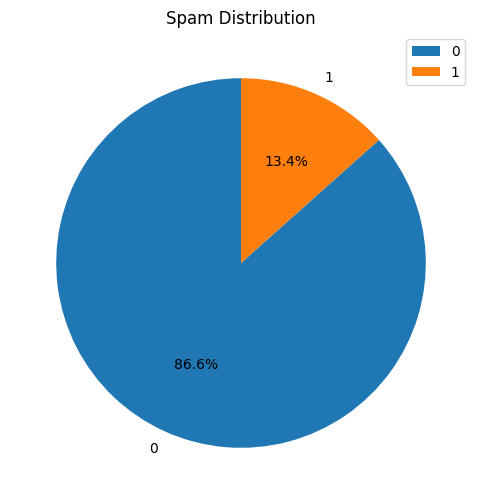

In [100]:
# Get value counts
value_counts = df['category'].value_counts()

# Create pie chart 
plt.figure(figsize=(8, 6))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  
plt.legend()
plt.title('Spam Distribution')
plt.show()

Text(0.5, 0, 'Message Length')

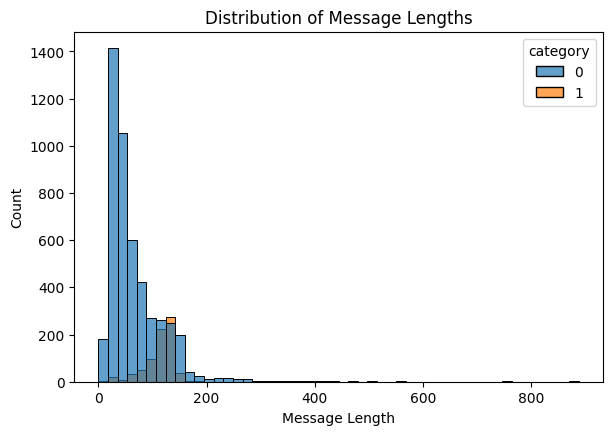

In [101]:
# Visualizations
plt.figure(figsize=(15, 10))

# Distribution of message lengths
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='message_length', hue='category', bins=50, alpha=0.7)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')

Text(0.5, 0, 'Word Count')

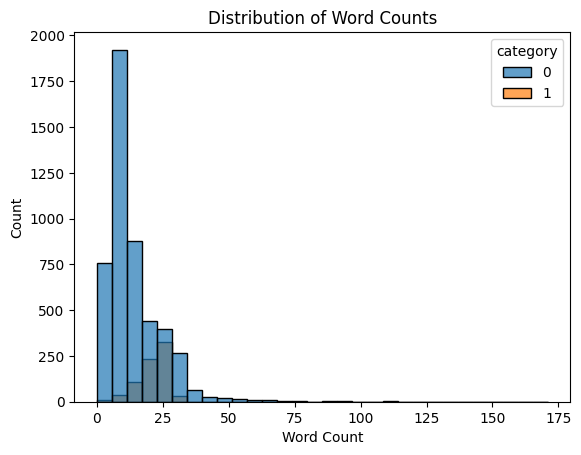

In [102]:
# Distribution of word counts
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='word_count', hue='category', bins=30, alpha=0.7)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')

Text(0.5, 1.0, 'Message Length by Label')

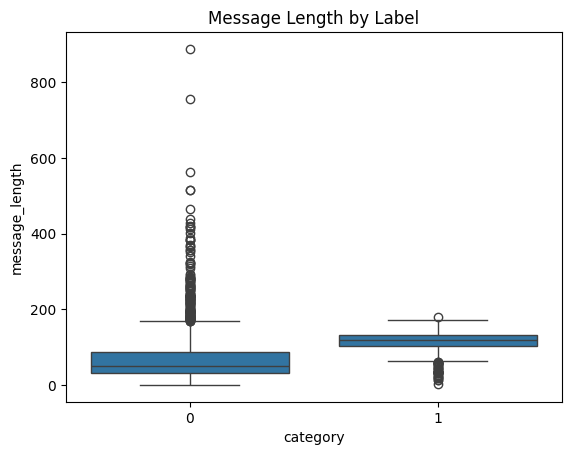

In [103]:
# Boxplot of message lengths
plt.subplot(1, 1, 1)
sns.boxplot(data=df, x='category', y='message_length')
plt.title('Message Length by Label')


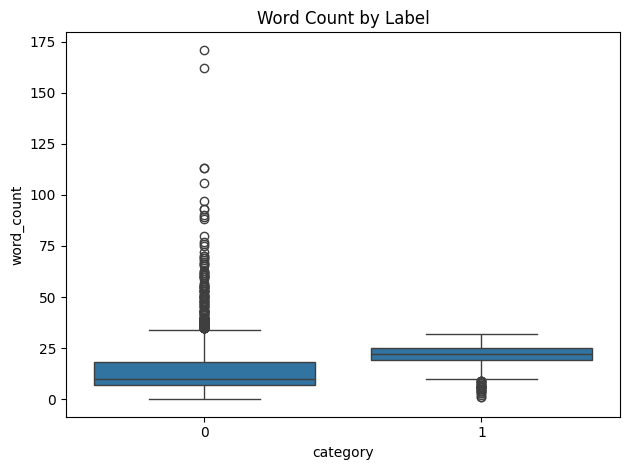

In [104]:
# Boxplot of word counts
plt.subplot(1, 1, 1)
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Word Count by Label')

plt.tight_layout()
plt.show()


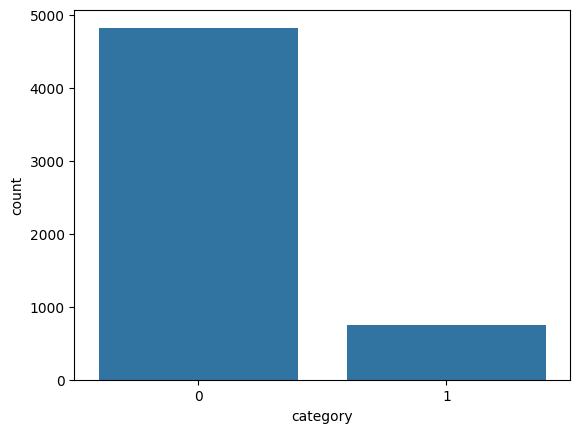

In [125]:
# Barplot on spam and not spam values
sns.barplot(df['category'].value_counts())
plt.show()

In [106]:
df.head()

,category,messege,message_length,word_count
0,0,go until jurong point crazy available only in ...,102,20
1,0,ok lar joking wif u oni,23,6
2,1,free entry in a wkly comp to win fa cup final ...,121,25
3,0,u dun say so early hor u c already then say,43,11
4,0,nah i dont think he goes to usf he lives aroun...,59,13


In [107]:
# dependent independent columns
X = df["messege"]
y = df["category"]

In [108]:
# train test split for model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [109]:
print("Training data size: ", X_train.shape)
print("Testing data size: ", X_test.shape)

Training data size:  (4457,)
Testing data size:  (1115,)


In [110]:
print("Training data size: ", y_train.shape)
print("Testing data size: ", y_test.shape)

Training data size:  (4457,)
Testing data size:  (1115,)


NAIVE BAYES

In [111]:
# pipline for train togather vectorizer and NAIVE BAYES
clf_niv=Pipeline([
    ('vectorizer',TfidfVectorizer(
        max_features=5000,  # Limit vocabulary size
        stop_words='english',  # Remove common English stop words
        ngram_range=(1, 2)
    )),
    ('nb',MultinomialNB(alpha=0.1))
])

MODEL TRAINING

In [112]:
clf_niv.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('nb', MultinomialNB(alpha=0.1))])

EVALUATION

In [113]:
print('Testing Accuracy',clf_niv.score(X_test,y_test)*100)
print('Training Accuracy',clf_niv.score(X_train,y_train)*100)

niv_bayes_acc = clf_niv.score(X_test,y_test)*100

Testing Accuracy 98.20627802690582
Training Accuracy 99.14740857078752


In [114]:
y_pred = clf_niv.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

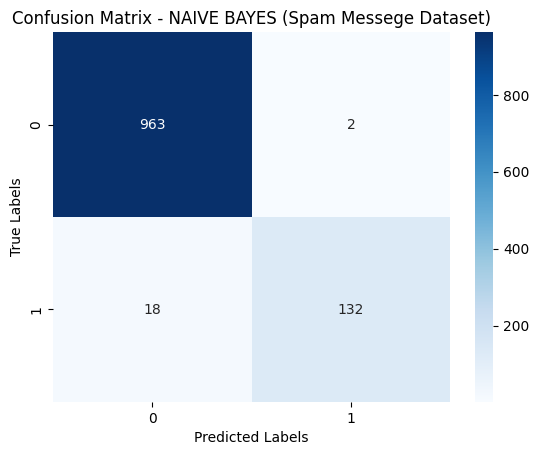

In [115]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - NAIVE BAYES (Spam Messege Dataset)')
plt.show()

In [116]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



LOGISTIC REGRESION

In [117]:
# pipline for train togather vectorizer and Logistic Regresion
clf_logcv=Pipeline([
    ('vectorizer',TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 2)
        )),
    ('logCV',LogisticRegressionCV(random_state=42))
])

MODEL TRAINING

In [118]:
clf_logcv.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logCV', LogisticRegressionCV(random_state=42))])

MODEL EVALUATION

In [119]:
print('Testing Accuracy',clf_logcv.score(X_test,y_test)*100)
print('Training Accuracy',clf_logcv.score(X_train,y_train)*100)

logcv_acc = clf_logcv.score(X_test,y_test)*100

Testing Accuracy 97.847533632287
Training Accuracy 100.0


In [120]:
y_pred = clf_logcv.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

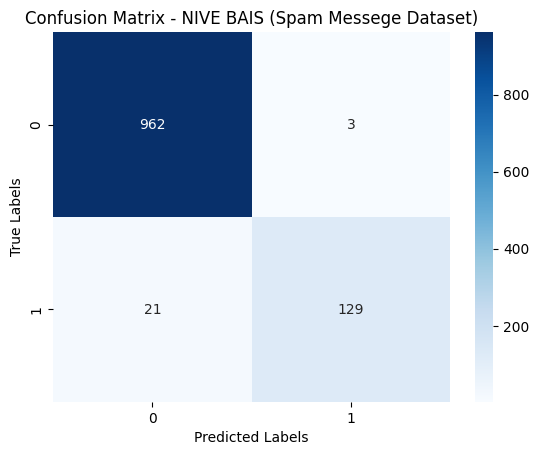

In [121]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - NIVE BAIS (Spam Messege Dataset)')
plt.show()

In [122]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



ALL MODDELS ACCURACY

In [123]:
print('Naive Bayes Accuracy',niv_bayes_acc)
print('Logistic RegresionCV Accuracy',logcv_acc)

Naive Bayes Accuracy 98.20627802690582
Logistic RegresionCV Accuracy 97.847533632287
